# OVERVIEW

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import pingouin as pg
from scipy import stats

In [2]:
pd.set_option('display.max_columns',100)
pd.set_option('max_colwidth', 100)

In [3]:
df = pd.read_csv('Data/Employee Attrition Cleaned.csv')
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,50.0,No,Travel_Rarely,Research & Development,1.0,2,Medical,4,Male,3,4,Research Director,4,Divorced,17399,6615,9,No,22,4,3,1,32,1,2,5,4,1,3
1,36.0,No,Travel_Rarely,Research & Development,6.0,2,Medical,2,Male,3,2,Manufacturing Director,2,Divorced,4941,2819,6,No,20,4,4,2,7,0,3,3,2,0,1
2,21.0,Yes,Travel_Rarely,Sales,7.0,1,Marketing,2,Male,3,1,Sales Representative,2,Single,2679,4567,1,No,13,3,2,0,1,3,3,1,0,1,0
3,50.0,No,Travel_Frequently,Human Resources,8.0,3,Medical,1,Male,3,5,Manager,2,Married,18200,7999,1,No,11,3,3,1,32,2,3,32,5,10,7
4,52.0,No,Travel_Rarely,Research & Development,7.0,4,Life Sciences,2,Male,3,3,Healthcare Representative,2,Single,10445,15322,7,No,19,3,4,0,18,4,3,8,6,4,0


In [4]:
df.shape

(1029, 29)

In [5]:
def summary(df):
    dtype = []
    nan = []
    nan_perc = []
    nunique = []
    unique = []
    
    for i in df.columns:
        dtype.append(df[i].dtype)
        nan.append(df[i].isna().sum())
        nan_perc.append((df[i].isna().sum()/len(df[i]))*100)
        nunique.append(df[i].nunique())
        val_counts = df[i].value_counts(normalize=True)
        unique.append(list(val_counts.index))
    
    summary_df = pd.DataFrame({'dtype': dtype, 'nan' : nan, 'nan_perc' : nan_perc, 'nunique' : nunique, 'unique': unique}, index=df.columns)
    
    return display(summary_df)

In [6]:
summary(df)

,dtype,nan,nan_perc,nunique,unique
Age,float64,0,0.0,39,"[37.0, 29.0, 36.0, 34.0, 31.0, 32.0, 33.0, 30.0, 40.0, 38.0, 27.0, 42.0, 41.0, 45.0, 39.0, 43.0,..."
Attrition,object,0,0.0,2,"[No, Yes]"
BusinessTravel,object,0,0.0,3,"[Travel_Rarely, Travel_Frequently, Non-Travel]"
Department,object,0,0.0,3,"[Research & Development, Sales, Human Resources]"
DistanceFromHome,float64,0,0.0,27,"[8.0, 1.0, 2.0, 9.0, 10.0, 7.0, 4.0, 6.0, 26.0, 18.0, 16.0, 11.0, 25.0, 24.0, 29.0, 12.0, 23.0, ..."
Education,int64,0,0.0,5,"[3, 4, 2, 1, 5]"
EducationField,object,0,0.0,6,"[Life Sciences, Medical, Marketing, Technical Degree, Other, Human Resources]"
EnvironmentSatisfaction,int64,0,0.0,4,"[3, 4, 2, 1]"
Gender,object,0,0.0,2,"[Male, Female]"
JobInvolvement,int64,0,0.0,4,"[3, 2, 4, 1]"


__Note :__ Dari dataset yang diterima terdapat dua tipe data, yaitu kategoori (object) dan numerik (int64 & float64). Namun, pada data numerik di dataset ini terdapat beberapa feature yang sebenarnya secara behaviour ia adalah categorical (ordinal), yaitu :
- Education
- Environmentsatisfaction
- JobInvolvement
- JobLevel
- JobSatisfaction 
- PerformanceRating
- RelationshipSatisfaction 
- StockOptionLevel
- WorkLifeBalance

Agar lebih mudah dalam melakukan EDA, maka feature-feature tersebut akan dilakukan formatting ulang menjadi kategori.

# DATA PREPARATION

# Category Features

In [7]:
cat_proc = ['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 
            'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']
df[cat_proc].head()

,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance
0,2,4,3,4,4,4,3,1,2
1,2,2,3,2,2,4,4,2,3
2,1,2,3,1,2,3,2,0,3
3,3,1,3,5,2,3,3,1,3
4,4,2,3,3,2,3,4,0,3


In [8]:
for i in df[cat_proc] :
    if i == 'Education' :
        df[i] = df[i].replace({1 : 'Below College', 2 : 'College', 3 : 'Bachelor', 4 : 'Master', 5 : 'Doctor'})
    elif i == 'JobLevel' :
        df[i] = df[i].replace({1 : 'Staff', 2 : 'Officer', 3 : 'Assistant Manager', 4 : 'Manager', 5 : 'Senior Manager'})
    elif i == 'PerformanceRating' :
        df[i] = df[i].replace({1 : 'Low', 2 : 'Good', 3 : 'Excellent', 4 : 'Outstanding'})
    elif i == 'StockOptionLevel' :
        df[i] = df[i].astype(object)
    elif i == 'WorkLifeBalance' :
        df[i] = df[i].replace({1 : 'Bad', 2 : 'Good', 3 : 'Better', 4 : 'Best'})
    else :
        df[i] = df[i].replace({1 : 'Low', 2 : 'Medium', 3 : 'High', 4 : 'Very High'})

In [9]:
summary(df[cat_proc])

,dtype,nan,nan_perc,nunique,unique
Education,object,0,0.0,5,"[Bachelor, Master, College, Below College, Doctor]"
EnvironmentSatisfaction,object,0,0.0,4,"[High, Very High, Medium, Low]"
JobInvolvement,object,0,0.0,4,"[High, Medium, Very High, Low]"
JobLevel,object,0,0.0,5,"[Staff, Officer, Assistant Manager, Manager, Senior Manager]"
JobSatisfaction,object,0,0.0,4,"[Very High, High, Medium, Low]"
PerformanceRating,object,0,0.0,2,"[Excellent, Outstanding]"
RelationshipSatisfaction,object,0,0.0,4,"[High, Very High, Medium, Low]"
StockOptionLevel,object,0,0.0,4,"[0, 1, 2, 3]"
WorkLifeBalance,object,0,0.0,4,"[Better, Good, Best, Bad]"


In [10]:
cat = df.select_dtypes(include=[object]).columns
cat_df = df[cat]
cat_df.head(2)

,Attrition,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance
0,No,Travel_Rarely,Research & Development,College,Medical,Very High,Male,High,Manager,Research Director,Very High,Divorced,No,Outstanding,High,1,Good
1,No,Travel_Rarely,Research & Development,College,Medical,Medium,Male,High,Officer,Manufacturing Director,Medium,Divorced,No,Outstanding,Very High,2,Better


# Numerical Features

In [11]:
num = df.select_dtypes(exclude=[object]).columns
num_df = df[num]
num_df.head(2)

,Age,DistanceFromHome,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,50.0,1.0,17399,6615,9,22,32,1,5,4,1,3
1,36.0,6.0,4941,2819,6,20,7,0,3,2,0,1


In [12]:
num_df.columns

Index(['Age', 'DistanceFromHome', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

# EXPLORATORY DATA ANALYSIS (EDA)

# Target Presentage

In [13]:
df['Attrition'].value_counts(normalize=True)

No     0.82896
Yes    0.17104
Name: Attrition, dtype: float64

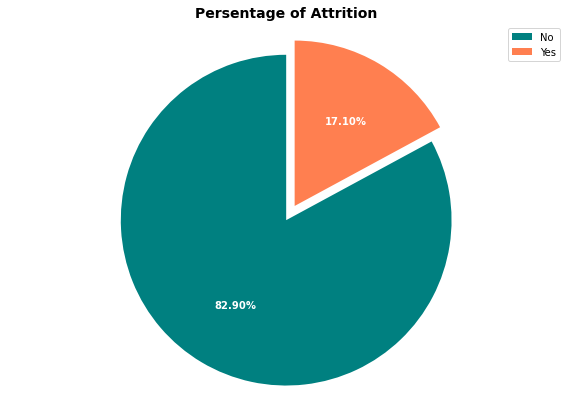

In [14]:
plt.figure(figsize=(10,7))
plt.title('Persentage of Attrition', fontweight='bold', fontsize=14)
plt.pie(df['Attrition'].value_counts(), 
        colors = ['teal', 'coral'],
        autopct='%.2f%%',
        textprops = {'color' : 'white', 'weight' : 'bold'},
        explode = [0,0.1],
        startangle = 90)
plt.legend(['No', 'Yes'], loc='upper right')
plt.axis('equal')
# plt.savefig('Target Pie.jpg')
plt.show()

__Note :__ Berdasarkan presentase feature Attrition, terlihat bahwa feature target ini merupakan Imbalance Data. Dari sisi perusahaan ini cukup baik karena karyawan yang memutuskan untuk mengunduran diri masing terbilang masih sedikit. Namun, tetap saja adanya pengunduran diri dari karyawan ini perlu dianalisa faktor penyebabnya dan juga dapat dilakukan prediksi karyawan mana yang mungkin kan mengundurkan diri apalagi yang berpotensi.

Ketika akan melakukan alogoritma Machine Learning yaitu saat pre-processing data, maka dapat menggunakan resampling data agar data menjadi balance.

# Statistic Analysis

Analisa statistika dilaukan pada data numerik. Analisa ini dilakukan agar mengetahui karakteristik dari data yang dimiliki melalui beberapa metode statistika.

> ## Descriptive Statistics

In [15]:
num_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1029.0,37.807580,8.758092,18.0,32.0,37.0,43.0,60.0
DistanceFromHome,1029.0,9.752187,8.042676,1.0,2.0,8.0,14.0,29.0
MonthlyIncome,1029.0,6449.796890,4794.525367,1009.0,2814.0,4735.0,8446.0,19999.0
MonthlyRate,1029.0,14250.629738,7088.757938,2094.0,7950.0,14295.0,20392.0,26999.0
NumCompaniesWorked,1029.0,2.653061,2.508186,0.0,1.0,1.0,4.0,9.0
PercentSalaryHike,1029.0,15.260447,3.665779,11.0,12.0,14.0,18.0,25.0
TotalWorkingYears,1029.0,11.196307,7.857581,0.0,6.0,10.0,15.0,40.0
TrainingTimesLastYear,1029.0,2.782313,1.283401,0.0,2.0,3.0,3.0,6.0
YearsAtCompany,1029.0,6.942663,6.068322,0.0,3.0,5.0,10.0,37.0
YearsInCurrentRole,1029.0,4.215743,3.658595,0.0,2.0,3.0,7.0,18.0


> # Normality Test

In [16]:
num_df.melt()

,variable,value
0,Age,50.0
1,Age,36.0
2,Age,21.0
3,Age,50.0
4,Age,52.0
...,...,...
12343,YearsWithCurrManager,8.0
12344,YearsWithCurrManager,2.0
12345,YearsWithCurrManager,0.0
12346,YearsWithCurrManager,3.0


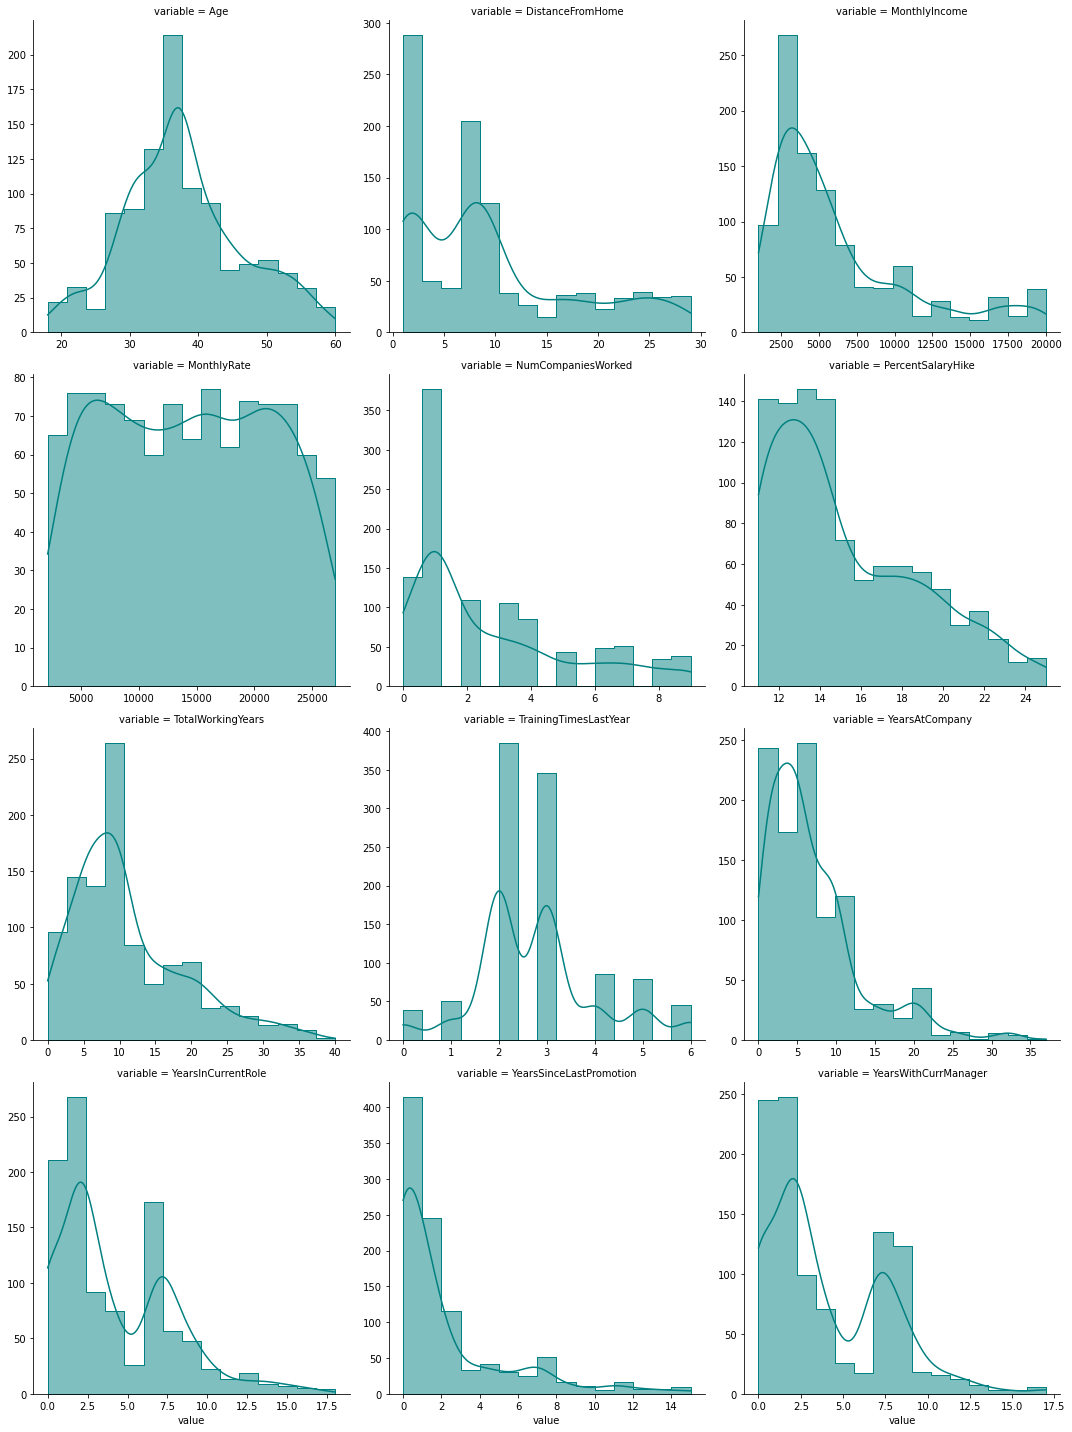

In [17]:
num_dist = sns.FacetGrid(num_df.melt(), col='variable', sharex=False, sharey=False, height=5, col_wrap=3)
num_dist.map(sns.histplot, 'value', kde=True, element='step', bins=15, color='teal')
plt.show()

In [18]:
def normality_test(df) :

    NumericalFeature = []
    SWT = []
    APT = []

    for col in df.columns :
        NumericalFeature.append(col)

        alpha = 0.05

        # Shapiro-Wilk Test
        vstats, p = stats.shapiro(df[col])
        if p < alpha :
            SWT.append('Non Normal Distribution')
        else :
            SWT.append('Normal Distribution')

        # Agostino-Pearson Test
        gstat, p2 = stats.normaltest(df[col])
        if p2 < alpha:
            APT.append('Non Normal Distribution')
        else :
            SWT.append('Normal Distribution')

    normality_df = pd.DataFrame({
        'Feature' : NumericalFeature,
        'Shapiro-Wilk Test' : SWT,
        'Agostino-Pearson Test' : APT
    })
    
    print('Alpha = 5%')
    return(normality_df)

In [19]:
normality_test(num_df)

Alpha = 5%


,Feature,Shapiro-Wilk Test,Agostino-Pearson Test
0,Age,Non Normal Distribution,Non Normal Distribution
1,DistanceFromHome,Non Normal Distribution,Non Normal Distribution
2,MonthlyIncome,Non Normal Distribution,Non Normal Distribution
3,MonthlyRate,Non Normal Distribution,Non Normal Distribution
4,NumCompaniesWorked,Non Normal Distribution,Non Normal Distribution
5,PercentSalaryHike,Non Normal Distribution,Non Normal Distribution
6,TotalWorkingYears,Non Normal Distribution,Non Normal Distribution
7,TrainingTimesLastYear,Non Normal Distribution,Non Normal Distribution
8,YearsAtCompany,Non Normal Distribution,Non Normal Distribution
9,YearsInCurrentRole,Non Normal Distribution,Non Normal Distribution


__Note :__ Berdasarkan 2 tipe normality test yang dilakukan, yaitu Shapiro-Wilk Test dan Agostino-Pearson Test, mengeluarkan hasil yang sama. Dimana, setiap feature numerikal merupakan data yang tidak terdistribusi normal.

> # Outliers Detection

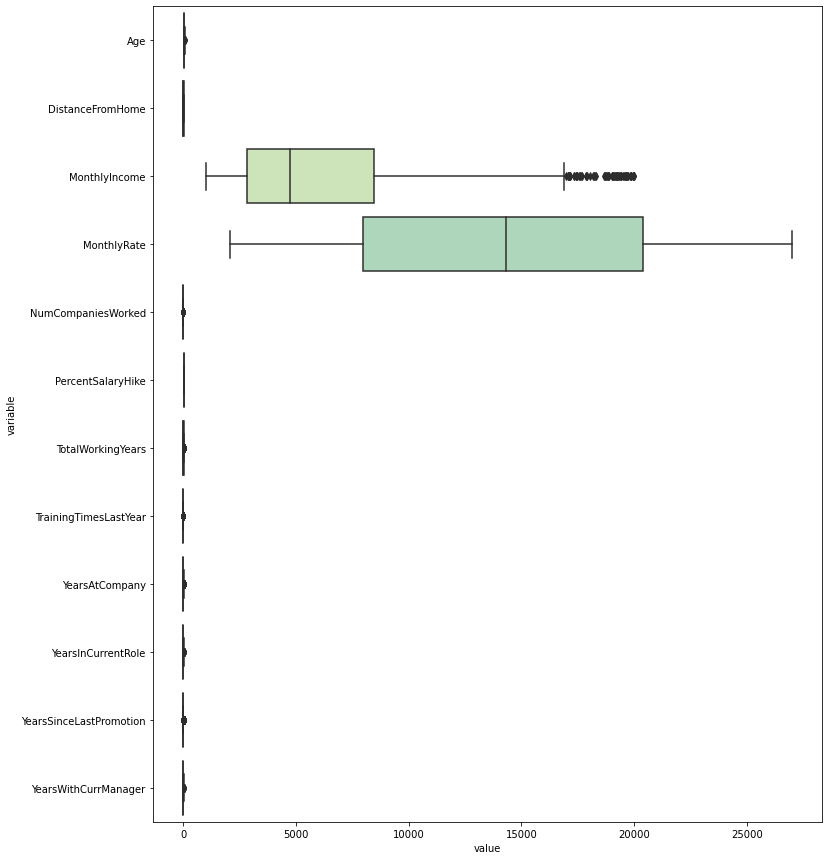

In [20]:
plt.figure(figsize=(12,15))
sns.boxplot(y='variable', x='value', data=num_df.melt(), palette='YlGnBu')
plt.show()

__Note :__ Dikarenakan hasil boxplot kurang representatif karena skala nilai yang berbeda, maka akan dipecah menjadi 2 bagian seperti berikut ini.

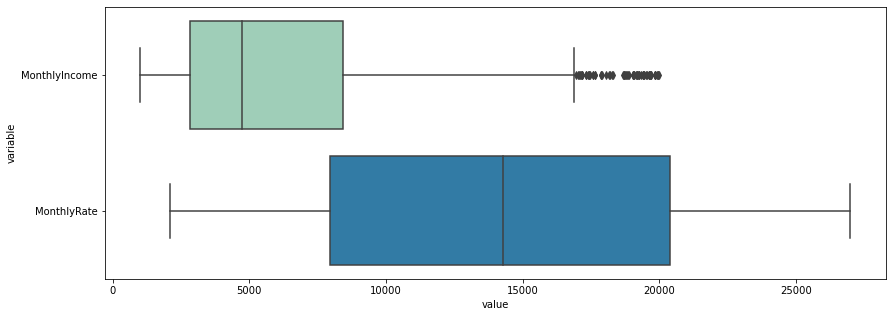

In [21]:
plt.figure(figsize=(14,5))
sns.boxplot(y='variable', x='value', data=num_df[['MonthlyIncome', 'MonthlyRate']].melt(), palette='YlGnBu')
plt.show()

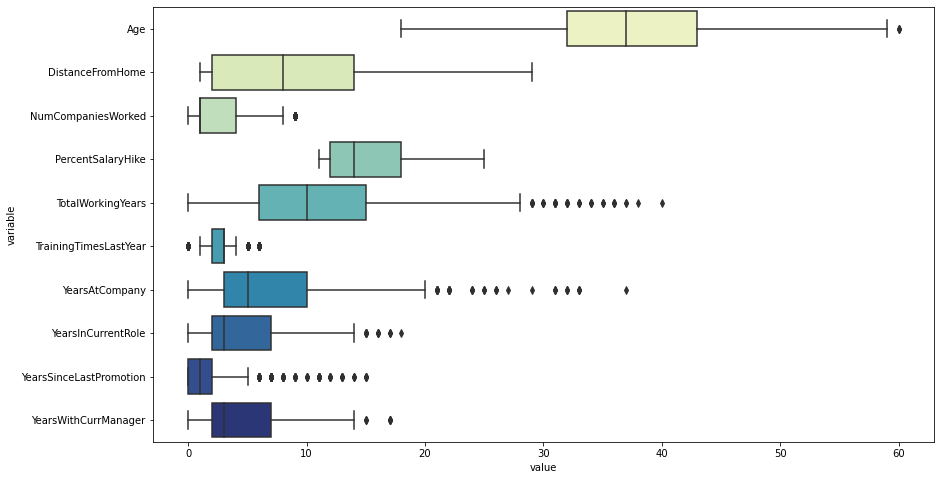

In [22]:
plt.figure(figsize=(14,8))
sns.boxplot(y='variable', x='value', data=num_df.drop(['MonthlyIncome', 'MonthlyRate'], axis=1).melt(), palette='YlGnBu')
plt.show()

In [23]:
def outliers(df) :
    NumFeature = []
    NumOutliers = []
    PercOutliers = []

    for col in df.columns :
        Q1 = df[col].quantile(0.25)
        Q2 = df[col].quantile(0.5)
        Q3 = df[col].quantile(0.75)

        IQR = (Q3 - Q1)*1.5
        lower = Q1 - IQR
        upper = Q3 + IQR

        outlier_count = 0
        
        for i in df[col] :
            if i > upper :
                outlier_count += 1
            if i < lower :
                outlier_count += 1
            else :
                outlier_count += 0
        
        outliers_perc = (outlier_count/len(df[col]))*100
        
        NumFeature.append(col)
        NumOutliers.append(outlier_count)
        PercOutliers.append(outliers_perc)
    
    outliers_df = pd.DataFrame({
        'Feature' : NumFeature,
        'Number of Outliers' : NumOutliers,
        'Outliers Percentage' : PercOutliers 
    })
    
    return display(outliers_df)

In [24]:
outliers(num_df)

,Feature,Number of Outliers,Outliers Percentage
0,Age,3,0.291545
1,DistanceFromHome,0,0.000000
2,MonthlyIncome,68,6.608358
3,MonthlyRate,0,0.000000
4,NumCompaniesWorked,38,3.692906
5,PercentSalaryHike,0,0.000000
6,TotalWorkingYears,45,4.373178
7,TrainingTimesLastYear,163,15.840622
8,YearsAtCompany,43,4.178814
9,YearsInCurrentRole,16,1.554908


__Note :__ Berdasarkan hasil boxplot dan perhitungan menggunakan IQR dari setiap feature, diketahui terdapat outliers pada feature berikut ini :
- Age
- MonthlyIncome
- NumCompaniesWorked
- TotalWorkingYears
- TrainingTimesLastYea
- YearsAtCompany
- YearsInCurrentRole
- YearsSinceLastPromotion
- YearsWithCurrManager	

# Features Correlation

> # Numerical Features : Independent Features - Independent Features
Pada tahap ini akan melihat hubungan antara independent features dengan independent features lainnya. Dilakukan menggunakan heatmap untuk melihat korelasi tersebut dengan korelasi spearman karena hampir rata-rata data terdistribusi tidak normal.

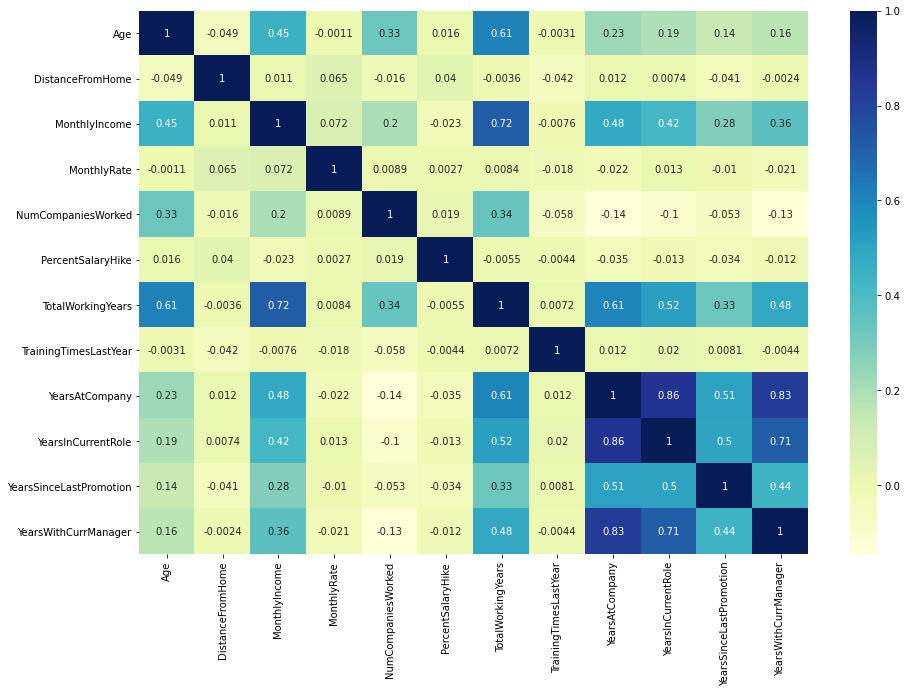

In [25]:
plt.figure(figsize=(15,10))
sns.heatmap(num_df.corr('spearman'), annot=True, cmap='YlGnBu')
plt.show()

__Note :__ Adanya korelasi yang kuat antar features ditetapkan dengan nilai korelasi lebih besar dari 0.5 dan nilai korelasi yang lebih kecil dari -0.5. agar lebih mudah melihatnya makan dilakukan plot heatmap seperti berikut.

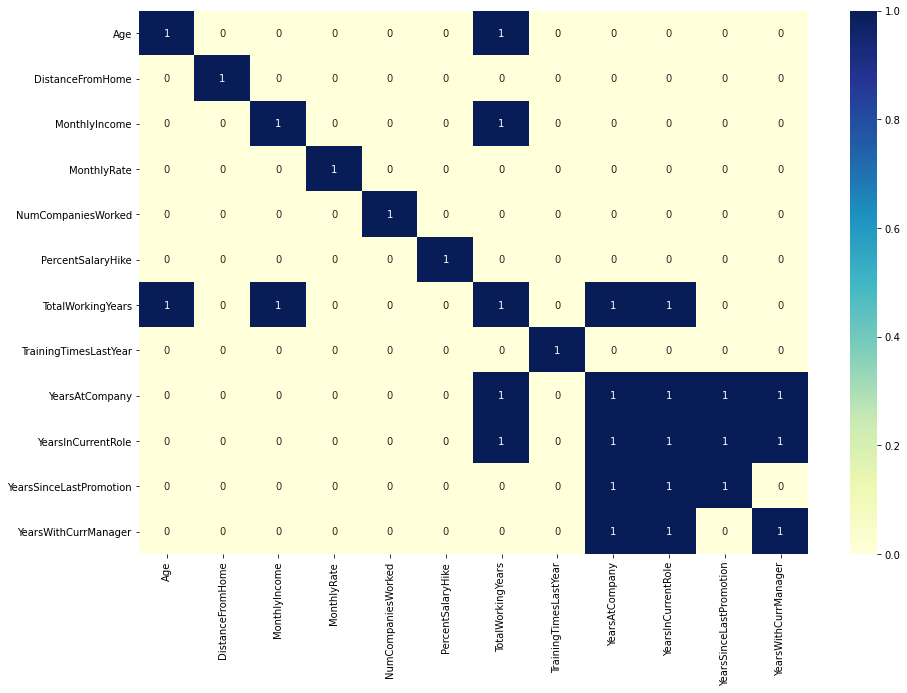

In [26]:
plt.figure(figsize=(15,10))
sns.heatmap((num_df.corr('spearman')>0.5) | (num_df.corr('spearman')<-0.5), annot=True, cmap='YlGnBu')
plt.show()

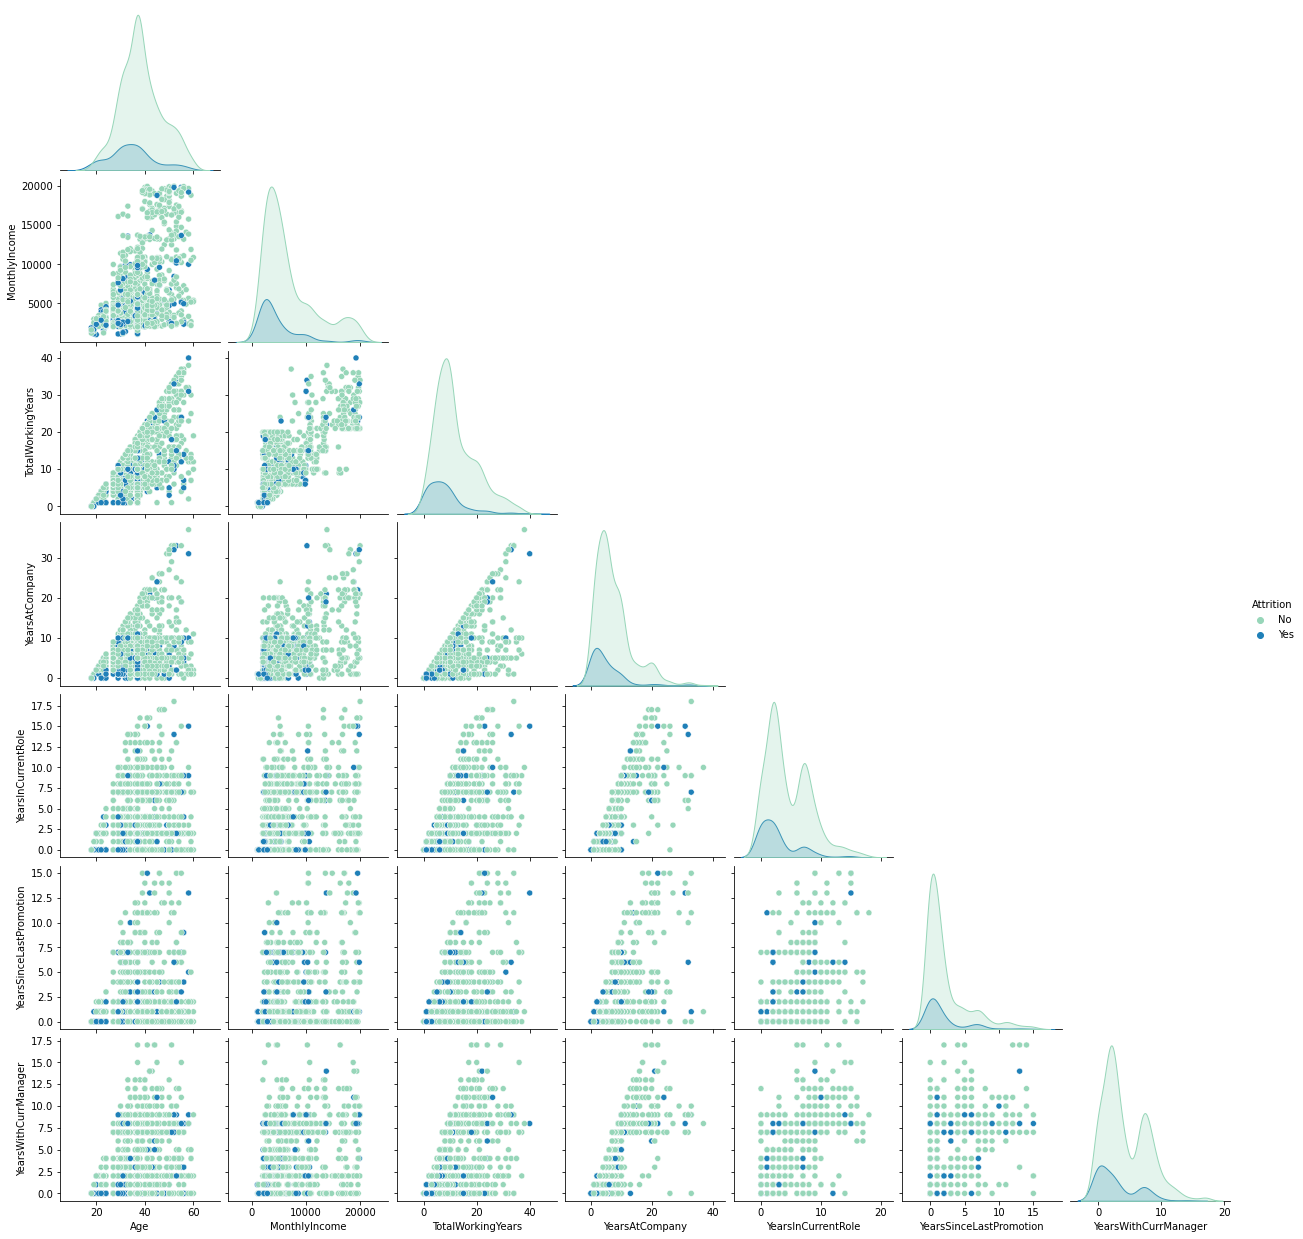

In [27]:
sns.pairplot(df[['Age', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 
                 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition']], 
             hue = 'Attrition', 
             corner = True,
             palette='YlGnBu')
plt.savefig('Independent Correlation.jpg')
plt.show()

__Note :__ Dari beberapa feature yang memiliki korelasi yang kuat, terlihat bahwa keseluruhannya memiliki korelasi yang positif. Dimana, semakin bertmbah usia, maka pengalaman kerja akan bertambah juga. Sehingga mendapatkann penghasilan per-bulan yang lebih tinggi.

> # Numerical Features : Independent Features - Dependent Features
Pada tahap ini akan melihat hubungan antara independent features dengan dependent feature, yaitu Attrition.

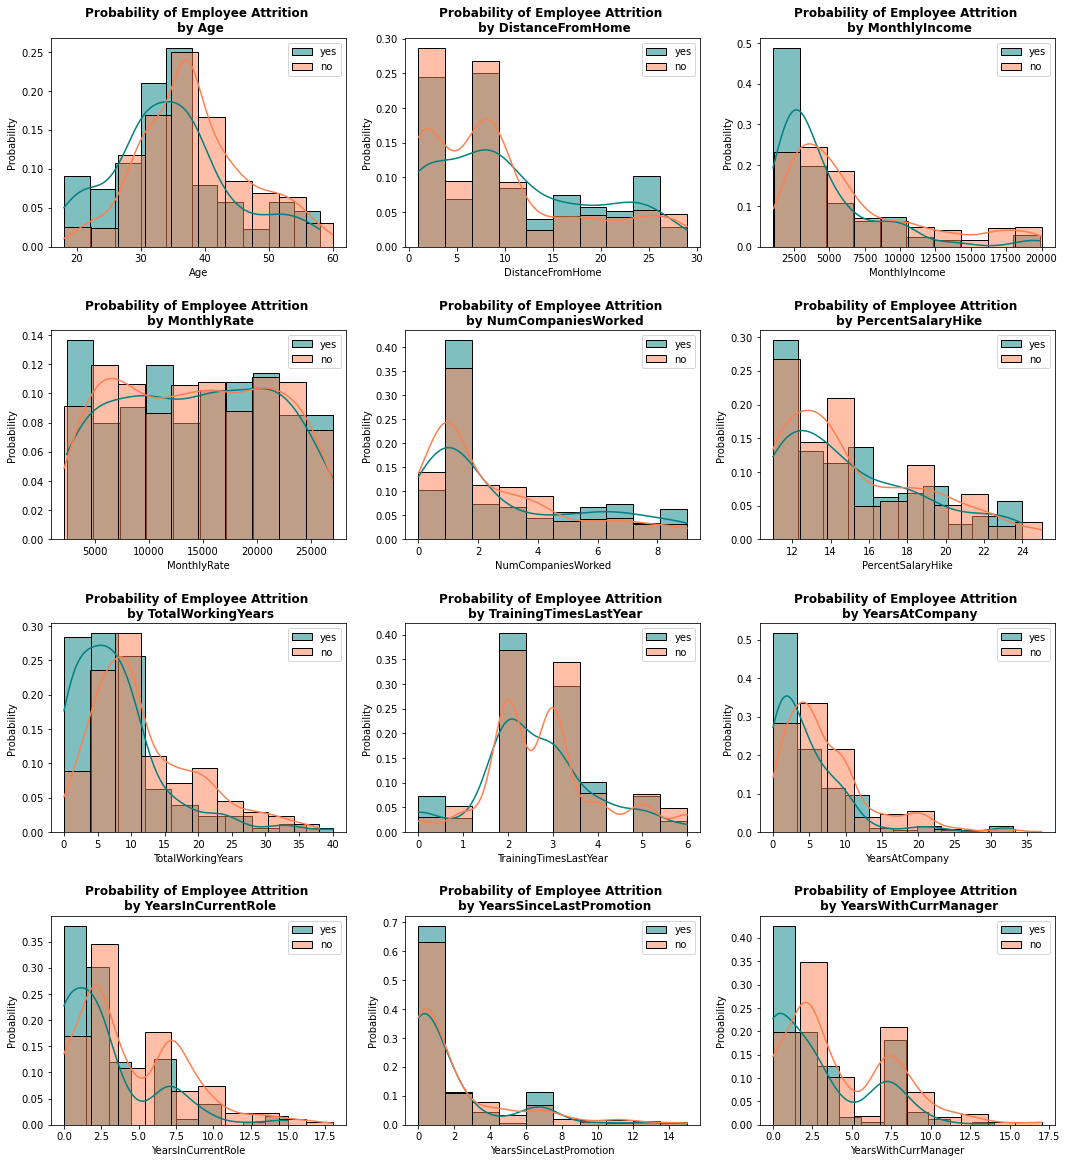

In [28]:
a = 4  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(18, 20))
fig.subplots_adjust(hspace=0.4, wspace=0.2)

for col in num_df.columns :
    plt.subplot(a, b, c)
    plt.title('Probability of Employee Attrition \n by {}'.format(col), fontweight="bold")
    sns.histplot(df[df['Attrition'] == 'Yes'][col], stat='probability', label='yes', color='teal', kde=True, bins=10)
    sns.histplot(df[df['Attrition'] == 'No'][col], stat='probability', label='no', color='coral', kde=True, bins=10)
    plt.legend(loc='upper right')
    c = c + 1

# plt.savefig('Numerical Plot.jpg')
plt.show()

__Note :__ Dari hasil probabilitas setiap numerikal feature dengan Attrition, terdapat beberapa korelasi yang kuat yang mungkin menjadi penyebab karyawan mengundurkan diri. Feature - feature tersebut adalah :
- __Age, TotalWorkingYears, YarsAtCompany, YearsinCurrentRole, YearsWithCurrManager :__ Kebanyakan karyawan yang mengundurkan diri adalah karyawan pada usia muda. Hal tersebut mungkin dikaenakan pada usia yang muda masih belum banyak memiliki pengalaman kerja. Sehingga, ingin mencoba mencari tempat atau pekerjaan yang lebih sesuai dengan pribadi.
- __DistanceFromHome__ : Semakin jauh jarak dari perusahaan ke tempat tinggal dapat menjadi penyebab karyawan mengundurkan diri.
- __Monthly Income__ : Adanya kekurangan pemasukan bagi karyawan dapat menjadi penyebab karyawan mengundurkan diri.
- __NumCompaniesWorked :__ Karyawan yang sudah banyak berkerja di banyak persahaan dapat menjadi penyebab karyawan mengundurkan diri. Karyawan-karyawan tersebut dimungkin karena mimiliki faktor loyalitas yang rendah dengan perusahaannya.

Sedangkan, beberapa feature yang tidak memiliki hubungan yang kuat dengan feature Attrition adalah :
- __MonthlyRate__
- __PercentSalaryHike__
- __YearsSinceLastPromotion__

> # Categorycal Features : Independent Features - Dependent Features
Pada tahap ini akan melihat hubungan antara independent features dengan dependent feature, yaitu Attrition.

In [29]:
cat_df.describe().T

,count,unique,top,freq
Attrition,1029,2,No,853
BusinessTravel,1029,3,Travel_Rarely,728
Department,1029,3,Research & Development,676
Education,1029,5,Bachelor,386
EducationField,1029,6,Life Sciences,426
EnvironmentSatisfaction,1029,4,High,310
Gender,1029,2,Male,617
JobInvolvement,1029,4,High,606
JobLevel,1029,5,Staff,403
JobRole,1029,9,Sales Executive,217


In [30]:
cat_df.melt()

,variable,value
0,Attrition,No
1,Attrition,No
2,Attrition,Yes
3,Attrition,No
4,Attrition,No
...,...,...
17488,WorkLifeBalance,Good
17489,WorkLifeBalance,Bad
17490,WorkLifeBalance,Better
17491,WorkLifeBalance,Better


In [31]:
cat_df.drop(['Attrition'], axis=1)

,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance
0,Travel_Rarely,Research & Development,College,Medical,Very High,Male,High,Manager,Research Director,Very High,Divorced,No,Outstanding,High,1,Good
1,Travel_Rarely,Research & Development,College,Medical,Medium,Male,High,Officer,Manufacturing Director,Medium,Divorced,No,Outstanding,Very High,2,Better
2,Travel_Rarely,Sales,Below College,Marketing,Medium,Male,High,Staff,Sales Representative,Medium,Single,No,Excellent,Medium,0,Better
3,Travel_Frequently,Human Resources,Bachelor,Medical,Low,Male,High,Senior Manager,Manager,Medium,Married,No,Excellent,High,1,Better
4,Travel_Rarely,Research & Development,Master,Life Sciences,Medium,Male,High,Assistant Manager,Healthcare Representative,Medium,Single,No,Excellent,Very High,0,Better
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024,Travel_Rarely,Research & Development,Bachelor,Life Sciences,Medium,Male,Very High,Officer,Laboratory Technician,High,Married,No,Excellent,Very High,2,Good
1025,Travel_Rarely,Research & Development,Bachelor,Life Sciences,Medium,Male,Very High,Officer,Healthcare Representative,Medium,Single,No,Excellent,Low,0,Bad
1026,Travel_Frequently,Research & Development,Master,Life Sciences,High,Male,Medium,Staff,Research Scientist,Very High,Married,Yes,Excellent,Medium,1,Better
1027,Travel_Rarely,Research & Development,College,Other,Very High,Male,Medium,Officer,Laboratory Technician,Medium,Married,Yes,Excellent,Low,1,Better


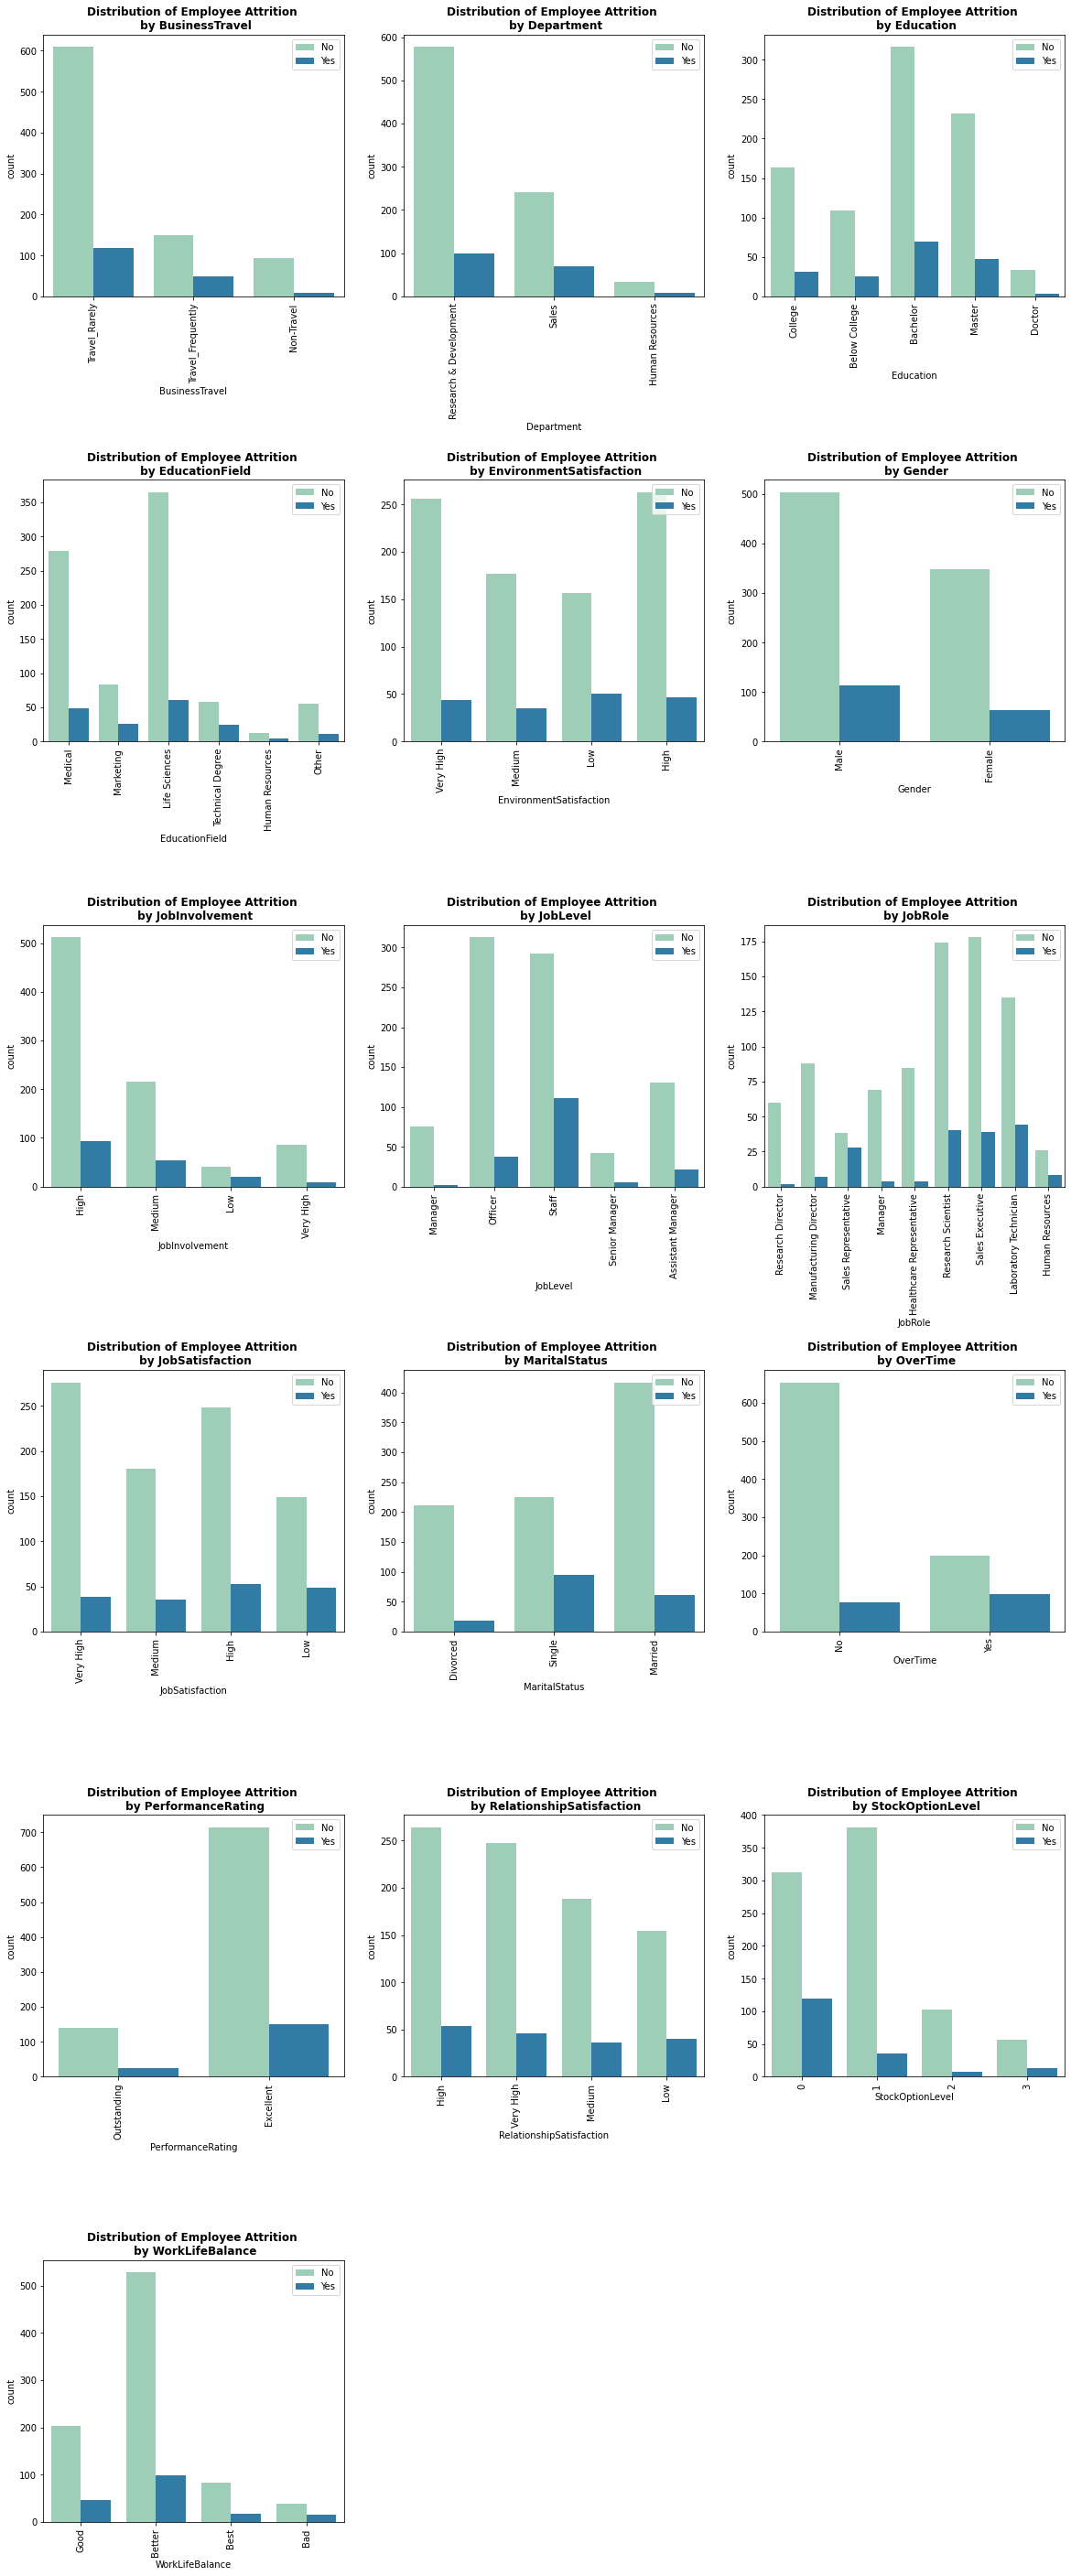

In [32]:
a = 6  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(20, 50))
fig.subplots_adjust(hspace=0.7, wspace=0.2)

for col in cat_df.drop(['Attrition'], axis=1).columns :
    plt.subplot(a, b, c)
    plt.title('Distribution of Employee Attrition \n by {}'.format(col), fontweight="bold")
    sns.countplot(x=col, data=cat_df, hue='Attrition', palette='YlGnBu')
    plt.xticks(rotation=90)
    plt.legend(loc='upper right')
    c = c + 1

plt.show()

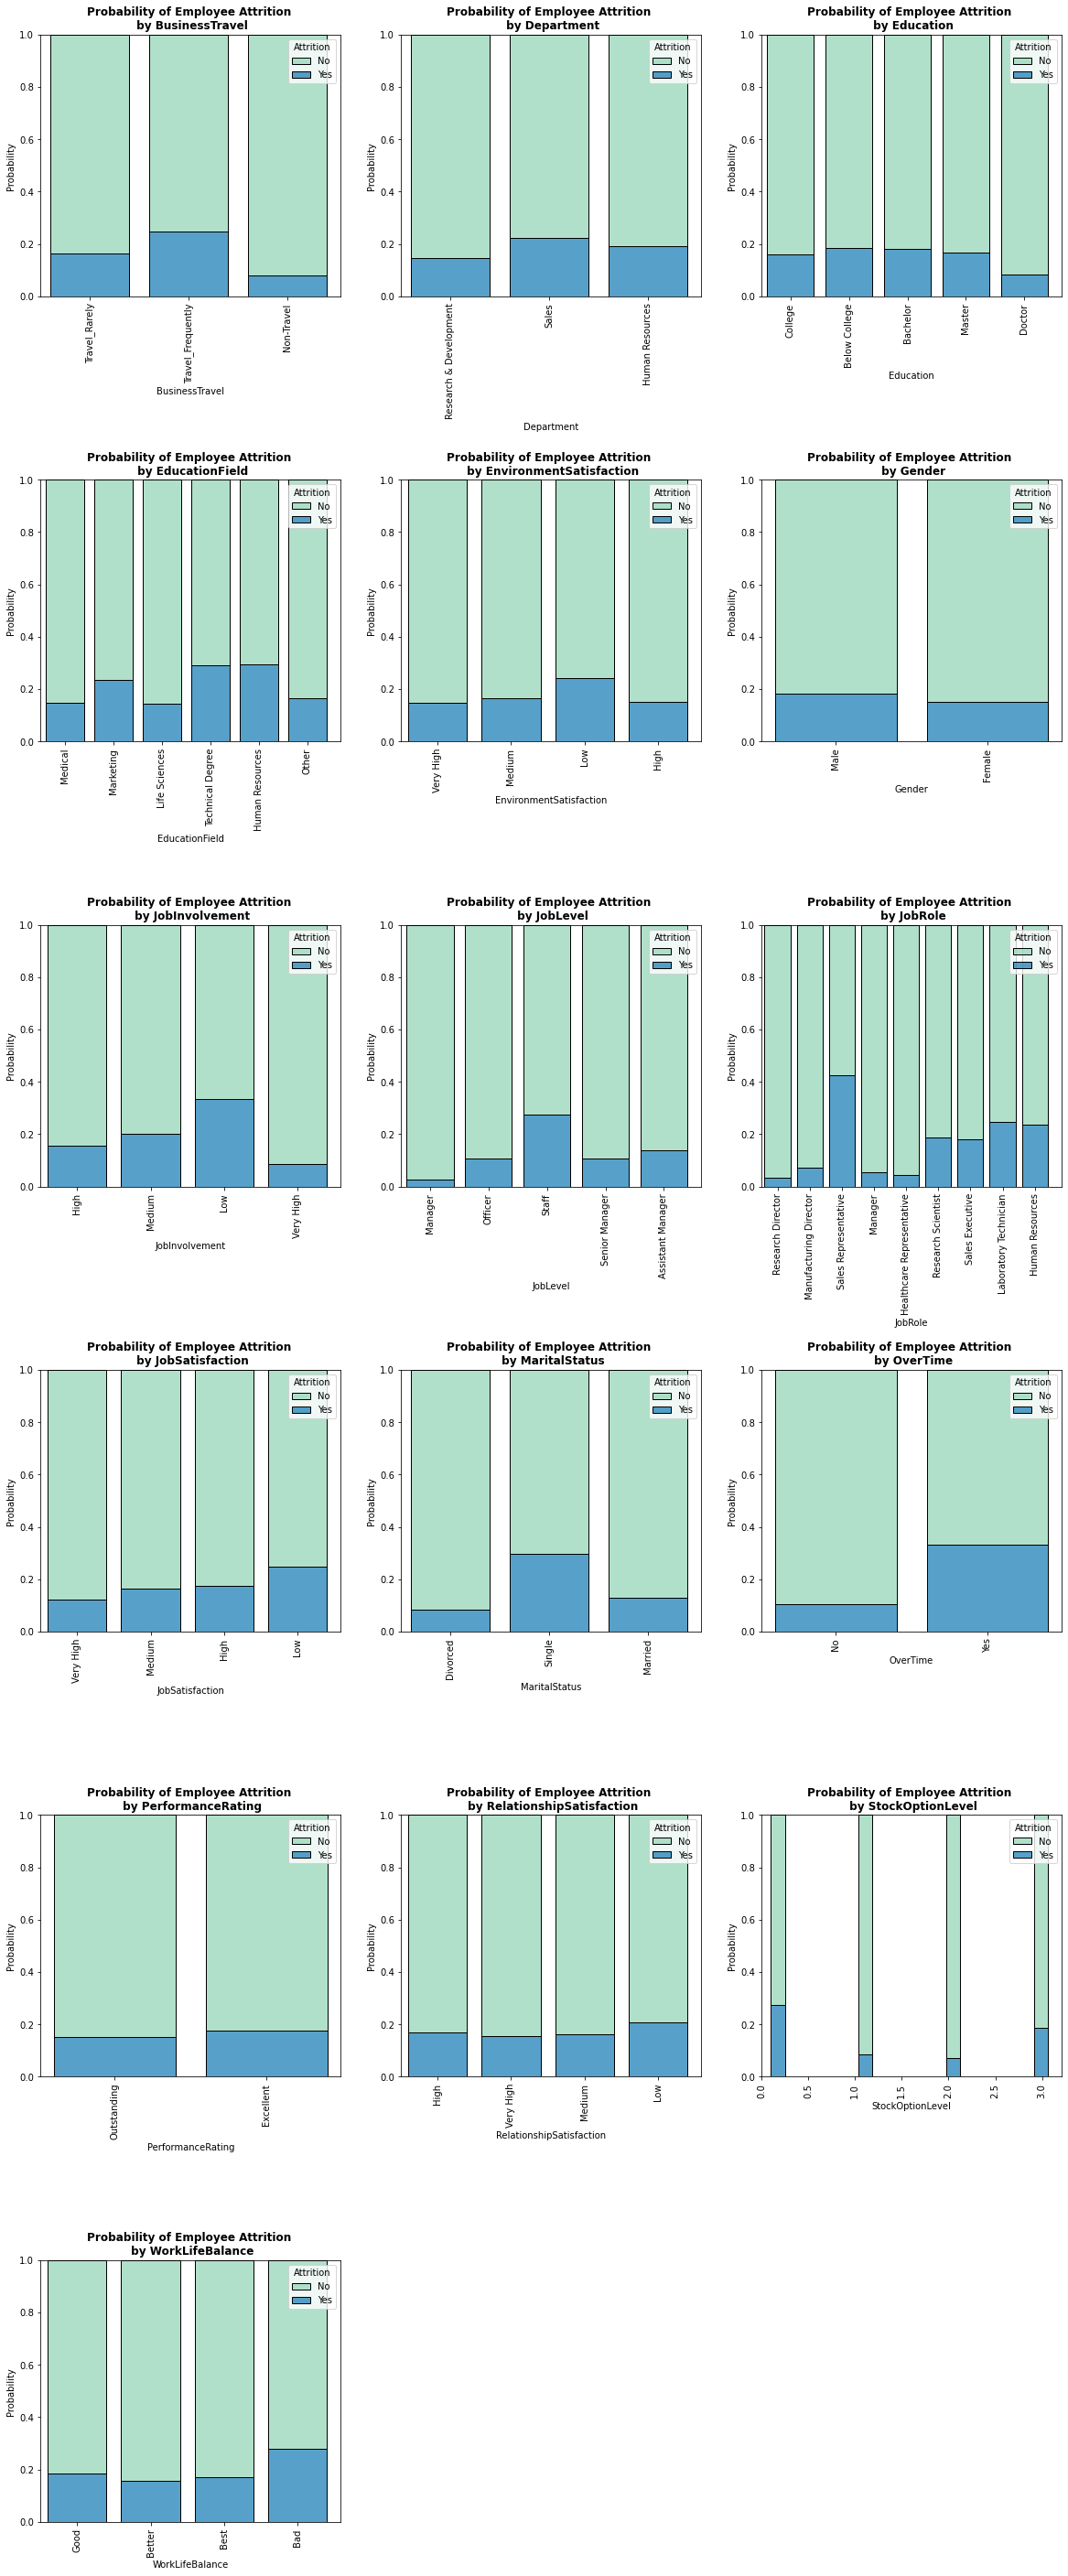

In [33]:
a = 6  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(20, 50))
fig.subplots_adjust(hspace=0.7, wspace=0.2)

for col in cat_df.drop(['Attrition'], axis=1).columns :
    plt.subplot(a, b, c)
    plt.title('Probability of Employee Attrition \n by {}'.format(col), fontweight="bold")
    sns.histplot(data=cat_df, x=col, hue='Attrition', stat="probability", multiple="fill", shrink=.8, palette='YlGnBu')
    plt.xticks(rotation=90)
    c = c + 1

# plt.savefig('Categorical Plot.jpg')
plt.show()

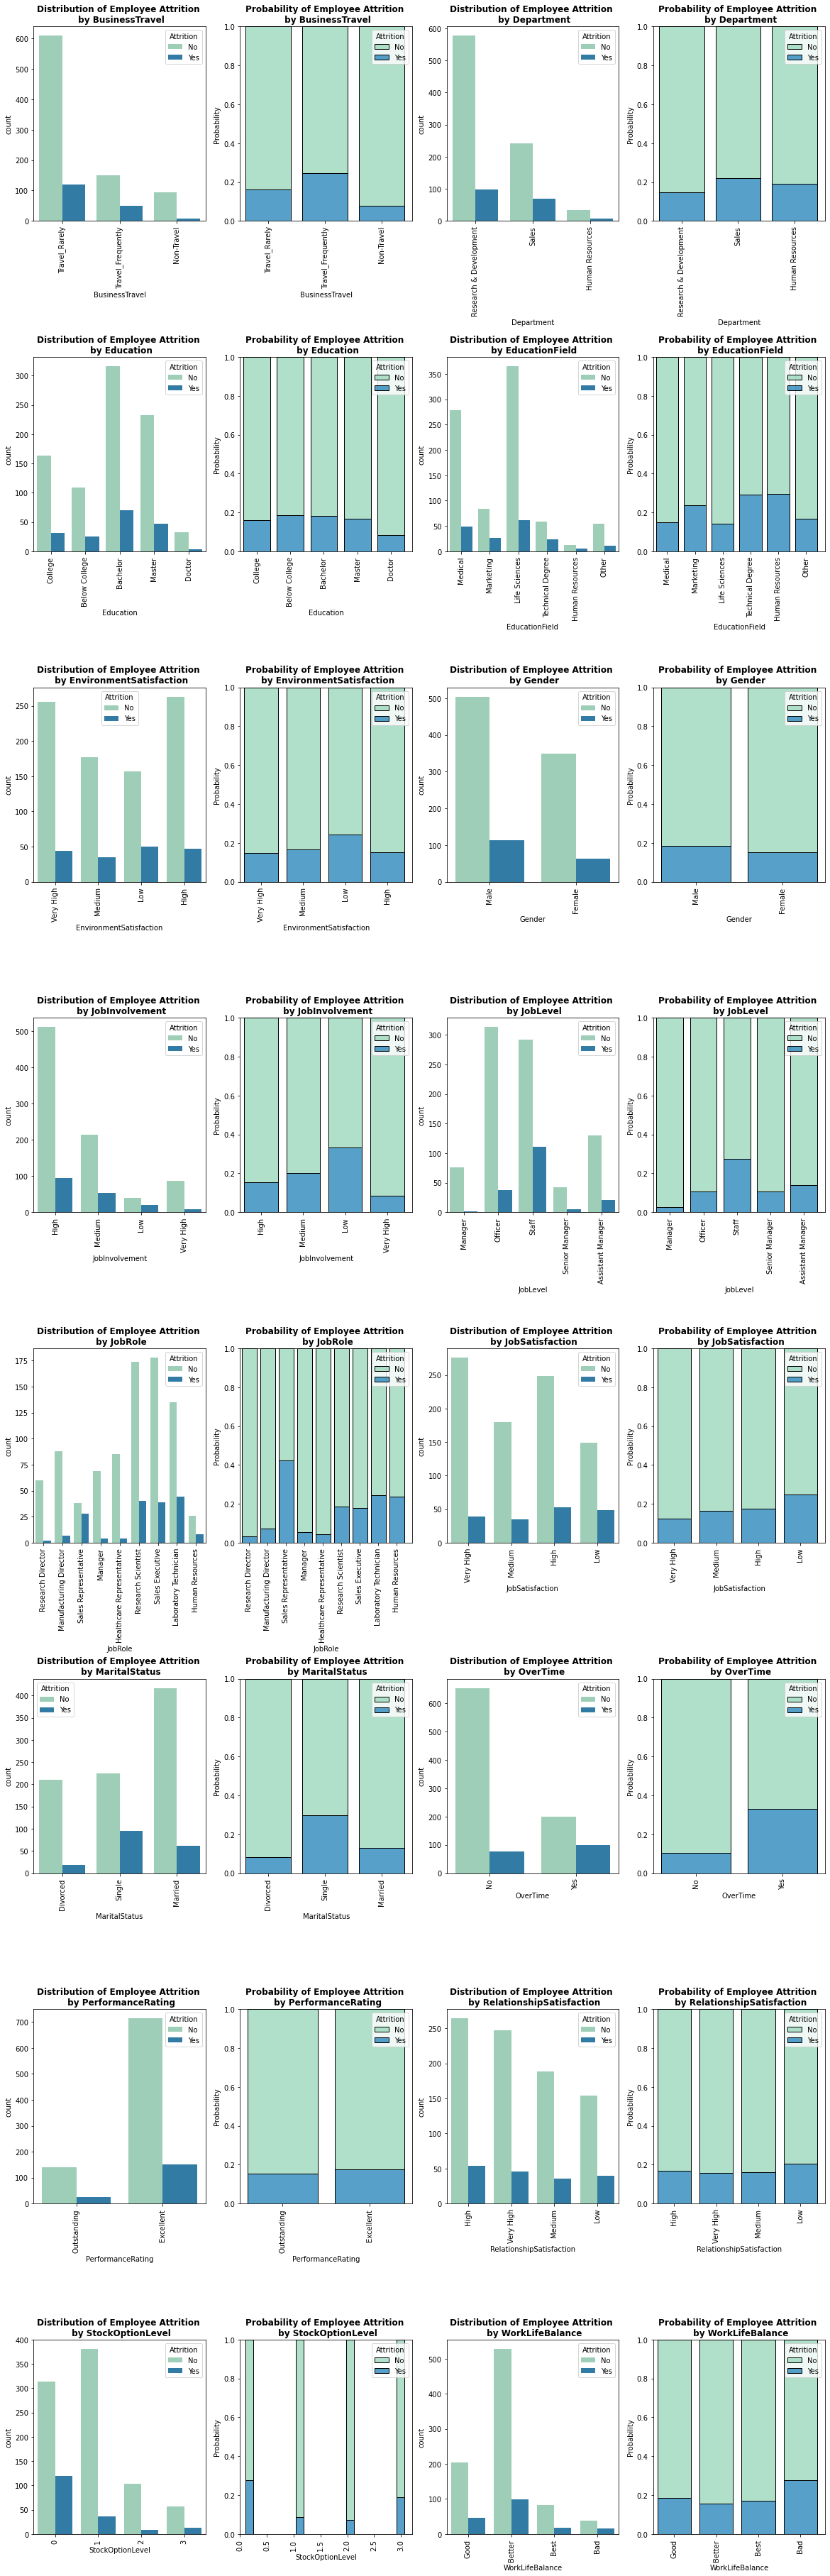

In [34]:
a = 8  
b = 4  
c = 1  
d = 2

fig = plt.figure(figsize=(20, 65))
fig.subplots_adjust(hspace=0.7, wspace=0.2)

for col in cat_df.drop(['Attrition'], axis=1).columns :
    plt.subplot(a, b, c)
    plt.title('Distribution of Employee Attrition \n by {}'.format(col), fontweight="bold")
    sns.countplot(x=col, data=cat_df, hue='Attrition', palette='YlGnBu')
    plt.xticks(rotation=90)
    c = c + 2

for col in cat_df.drop(['Attrition'], axis=1).columns :
    plt.subplot(a, b, d)
    plt.title('Probability of Employee Attrition \n by {}'.format(col), fontweight="bold")
    sns.histplot(data=cat_df, x=col, hue='Attrition', stat="probability", multiple="fill", shrink=.8, palette='YlGnBu')
    plt.xticks(rotation=90)
    d = d + 2
    
# plt.savefig('Categorical Plot.jpg')
plt.show()


__Note :__ Dari hasil probabilitas setiap categorical feature dengan Attrition, terdapat feature menarik yang memiliki korelasi kuat yang mungkin menjadi penyebab karyawan mengundurkan diri. Feature - feature tersebut adalah :
- __BusinessTravel :__ Semakin sering karyawan yang pegi untuk hubungan bisnis, maka akan berpeluang karyawan untuk mengundurkan diri.
- __Department, JobLevel, JobRole__ : Karyawan yang mengundurkan diri adalah karyawan yang bekerja pada bagian Sales dengan level staff.
- __EnvironmentSatisfaction & JobSatisfaction__ : Adanya kepuasan yang rendah terhadapat bagian Lingkungan dan Pekerjaan di perusahaan dapat mengatkan karyawan akan mengundurkan diri.
- __JobInvolvement :__ Karyawan yang memiliki keterlibatan yang rendah dapat memungkinkan karyawan mengundurkan diri.
- __MaritalStatus :__ Karyawan dengan status single lebih besar peluangnya untuk meninggalkan perusahahaan. Karyawan dengan status single tersebut dimungkinkan adalah karyawan yang muda yang ingin mencoba di tperusahaan lain.
- __OverTime & WorkLifeBalance :__ Karyawan yang lebih sering lembur dapat membuat keseimbangan antara pekerjaan dengan hidupnya semakin rendah. Hal tersebut dapat membuat peluang mengundurkan diri. 

Sedangkan, beberapa feature yang tidak memiliki hubungan yang kuat dengan feature Attrition adalah :
- Gender
- PerformanceRating
- RelationshipSatisfaction

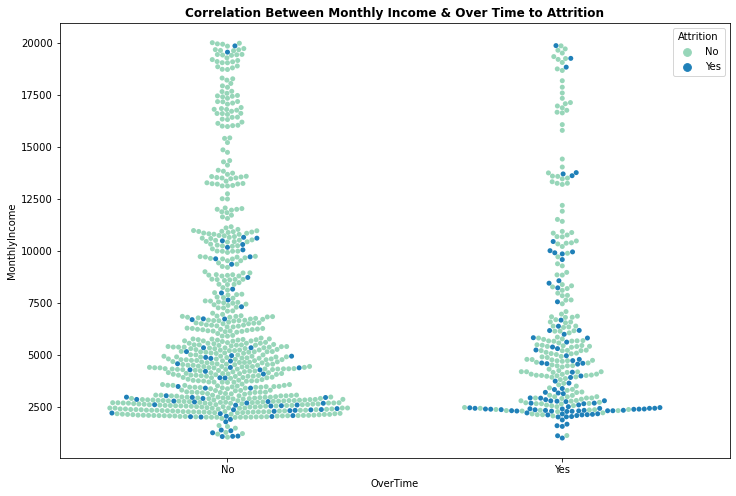

In [38]:
plt.figure(figsize=(12, 8))
sns.swarmplot(y="MonthlyIncome", x="OverTime", hue="Attrition", palette='YlGnBu', data=df)
plt.title('Correlation Between Monthly Income & Over Time to Attrition', fontweight='bold')
plt.show()

__Note :__ Berdasarkan hubungan MonthlyIncome dan OverTime terhadap Attrition terlihat pada swarmplot bahwa banyak karyawan yang lembur namun pendapatan yang diterima masih rendah. Ini dapat saran untuk manajemen agar dilakukan penyesuaian kembali terhadap uang lembur yang diterima oleh karyawan.